In [1]:
from Functions import *

Sample start date:  2005-02-11 00:00:30 
Sample end date: 2005-02-11 19:41:30
['2005-02-11 08:01:30', '2005-02-11 08:18:30', '2005-02-11 19:23:30']


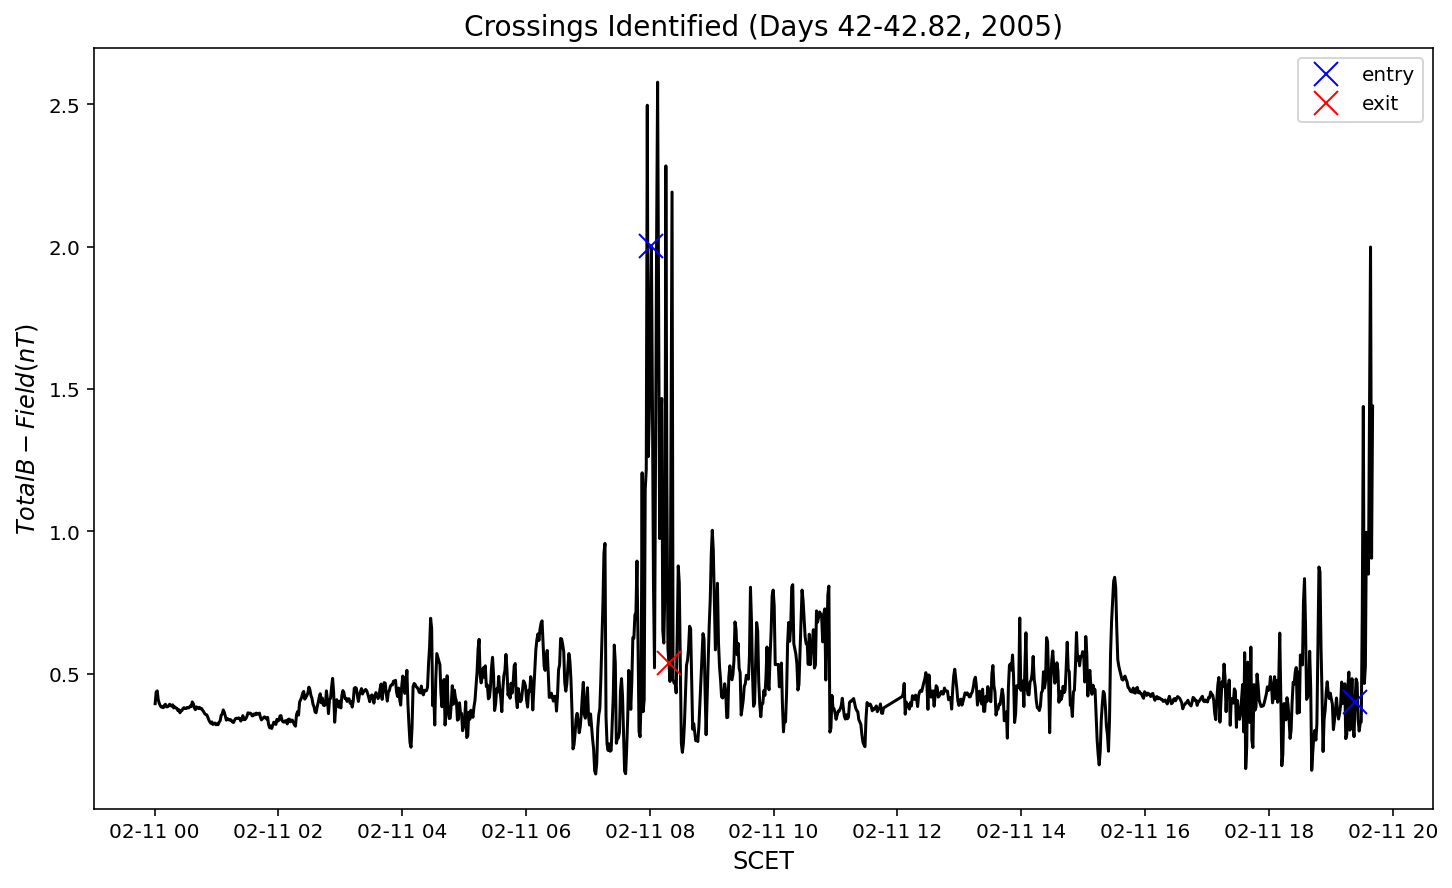

In [2]:
windowsize = 7
estimatedNumCrossings = 15
year=2005
start_day1 =42
end_day1 = 42.82

day_data1_2004 = get_day_data(start_day1, end_day1, year)
#plot_KSM(day_data1_2004, year, start_day1, end_day1, xFormat = "Hour")
entries1, exits1, ax1, ksmcoords_1,cross_array1 = identify_crossings_2(day_data1_2004, windowsize, estimatedNumCrossings,3,2,360)
plt.title("Crossings Identified (Days {}-{}, {})".format(start_day1, end_day1,year),fontsize = 14)

print(cross_array1)

In [0]:
estimatedNumCrossings = 8

start_day2 = 55
end_day2 = 64.8
day_data2_2004 = get_day_data(start_day2, end_day2, year)
#plot_KSM(day_data2_2004, year, start_day2, end_day2, xFormat = "Hour")
entries2, exits2, ax2, ksmcoords_2,cross_array2 = identify_crossings_2(day_data2_2004, windowsize, estimatedNumCrossings,3,2,110)
plt.title("Crossings Identified (Days {}-{}, {})".format(start_day2, end_day2,year),fontsize = 14)

print(cross_array2)

In [0]:
cross_array = cross_array1 + cross_array2
print('crossing dates',cross_array)
day_data_2004 = get_day_data(start_day1,end_day2,year)
day_data_2004.index.strftime('%Y-%m-%d %H:%M:%S')

In [0]:
offset=4
mins=8+offset

b1, b2 = extract_B_vector3(cross_array, day_data_2004, mins,offset)

type1 = ['entry', 'exit', 'entry', 'exit' ,'entry', 'exit','entry', 'exit', 'entry', 'exit' ,'entry']
num = np.arange(1, len(cross_array)+1, 1)

ncp,ave_ncp,std_ncp,shock_v,ave_shock, std = ncp_shock3(b1, b2, 8, num, type1)

In [0]:
Plot_Dist_for_theta([*shock_v])
plt.title("Kurtosis vs Skewness (Days 42-65, 2005)", fontsize = 15)
plt.xlabel("Kurtosis of ${\Theta}_{BN}$", fontsize = 15)
plt.ylabel("Skewness of ${\Theta}_{BN}$", fontsize = 15)

In [0]:
x_ncp,rho_ncp,srho_ncp=plotncp(day_data_2004,cross_array,1,ave_ncp,std_ncp,1,10)
plt.xlabel(r"$X_{KSM}  \left(R_s\right)$",fontsize = 12)
plt.ylabel(r"$\left(Y_{KSM}^2 + Z_{KSM}^2\right)^{1/2} \left(R_s\right)$",fontsize = 12)
plt.title("Projections of Co-planarity Normals (Days 42-65, 2005)", fontsize = 15)
plt.ylim(10,50)
plt.xlim(10,30)
plt.gca().invert_yaxis()

In [0]:
t,st=calCPM(day_data_2004,cross_array,ave_ncp,rho_ncp,std_ncp,srho_ncp)
plt.ylim(30,36)
plt.xlim(23.5,25.5)
plt.xlabel(r"$X_{KSM}  \left(R_s\right)$",fontsize = 12)
plt.ylabel(r"$\left(Y_{KSM}^2 + Z_{KSM}^2\right)^{1/2} \left(R_s\right)$",fontsize = 12)
plt.title('A Representation of Norm Vectors (Days 42-65, 2005)',fontsize = 15)


In [0]:
#for i in range(len(st)):
    #st[i]=st[i]/2
    #std[i]=std[i]/2
plt.figure()
plt.plot(ave_shock,t,'.')
plt.xlabel('Shock Angle ${\Theta}_{BN}$',fontsize = 12)
plt.ylabel('Angle Between Model and Co-planarity Normals ${\Theta}_{CPM}$ ',fontsize = 12)
plt.title('Shock Angle ${\Theta}_{BN}$ vs ${\Theta}_{CPM}$ (Days 42-65, 2005)',fontsize = 15)
plt.errorbar(ave_shock,t,xerr=std,yerr=st,fmt='o',color='k')
plt.ylim(-10,100)
plt.xlim(0,90 )
for i in range(len(srho_ncp)):
    S='S'+str(i+1)
    plt.annotate(S, (ave_shock[i],t[i]+1) )